In [1]:
from tensorflow.keras import layers, models
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
import glob, numpy as np
import matplotlib.pyplot as plt
from keras import optimizers

In [2]:
import time
start = time.time()  # 시작 시간 저장

In [3]:
tf.random.set_seed(111)
np.random.seed(111)

In [4]:
dir_data = "Data_Man_Woman"
categories = ["1", "2"]
num_classes = len(categories)

In [5]:
im_size = 64 #96 #64 #32
image_w = im_size
image_h = im_size

In [6]:

X = []
y = []
for idx, cat in enumerate(categories):

    # Y : one-hot
    label = [0 for i in range(num_classes)]
    label[idx] = 1

    # X : array
    image_dir = "./"+dir_data + "/" + cat
    files = glob.glob(image_dir + "/*.jpg")
    #print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        #
        ### img preprocessing
        img = img.convert("RGB")
        #
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 50 == 0:
            print(cat, " : ", f)

1  :  ./Data_Man_Woman/1\face_1000.jpg
1  :  ./Data_Man_Woman/1\face_1074.jpg
1  :  ./Data_Man_Woman/1\face_1141.jpg
1  :  ./Data_Man_Woman/1\face_1199.jpg
1  :  ./Data_Man_Woman/1\face_1263.jpg
1  :  ./Data_Man_Woman/1\face_1319.jpg
1  :  ./Data_Man_Woman/1\face_1385.jpg
1  :  ./Data_Man_Woman/1\face_1440.jpg
1  :  ./Data_Man_Woman/1\face_1497.jpg
1  :  ./Data_Man_Woman/1\face_465.jpg
1  :  ./Data_Man_Woman/1\face_529.jpg
1  :  ./Data_Man_Woman/1\face_595.jpg
1  :  ./Data_Man_Woman/1\face_668.jpg
1  :  ./Data_Man_Woman/1\face_747.jpg
1  :  ./Data_Man_Woman/1\face_838.jpg
1  :  ./Data_Man_Woman/1\face_908.jpg
1  :  ./Data_Man_Woman/1\face_974.jpg
2  :  ./Data_Man_Woman/2\face_1000.jpg
2  :  ./Data_Man_Woman/2\face_1059.jpg
2  :  ./Data_Man_Woman/2\face_1120.jpg
2  :  ./Data_Man_Woman/2\face_1172.jpg
2  :  ./Data_Man_Woman/2\face_1231.jpg
2  :  ./Data_Man_Woman/2\face_1309.jpg
2  :  ./Data_Man_Woman/2\face_1374.jpg
2  :  ./Data_Man_Woman/2\face_449.jpg
2  :  ./Data_Man_Woman/2\face_504.

In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)

In [9]:
print("ok", len(y))

ok 1629


In [10]:
y_train_v = np.argmax(y_train, axis=1).reshape(-1, 1)
y_test_v = np.argmax(y_test, axis=1).reshape(-1, 1)

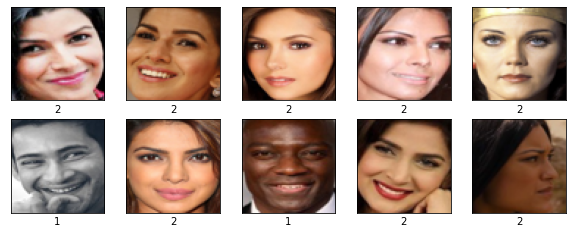

In [11]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(categories[y_test_v[i][0]])
plt.show()

In [12]:
# build model networks
k_width, k_height = 7, 7 # 5, 5 #3, 3
#
model = models.Sequential()
model.add(layers.Conv2D(64, (k_width, k_height), activation='relu', input_shape=(im_size, im_size, 3))) # input_shape=(32, 32, 3)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (k_width, k_height), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (k_width, k_height), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(num_classes, activation='softmax'))
#model.summary()

In [13]:
# 3. 모델 학습과정 설정하기
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [14]:
# 4. 모델 학습시키기
history = model.fit(X_train, y_train_v,
                    epochs= 3, # 5, 10, 20, 40
                    # Man Woman : 60, 75, 80, 90 [%]
                    batch_size=100,
                    validation_data=(X_test, y_test_v))

Epoch 1/3
13/13 [==============================] - 10s 649ms/step - loss: 23.3142 - accuracy: 0.5111 - val_loss: 0.7026 - val_accuracy: 0.5466
Epoch 2/3
13/13 [==============================] - 8s 608ms/step - loss: 0.7877 - accuracy: 0.4767 - val_loss: 0.6921 - val_accuracy: 0.5098
Epoch 3/3
13/13 [==============================] - 8s 611ms/step - loss: 0.6913 - accuracy: 0.5348 - val_loss: 0.6706 - val_accuracy: 0.5956


In [15]:
# 5. 모델 평가하기
test_loss, test_acc = model.evaluate(X_test, y_test_v)

13/13 [==============================] - 1s 44ms/step - loss: 0.6706 - accuracy: 0.5956


In [16]:
print('')
print('loss : ' + str(test_loss))
print('acc : ' + str(test_acc))


loss : 0.6706458330154419
acc : 0.595588207244873


In [17]:
# 6. 모델 저장하기
model.save('./Model/trained_model.h5')

In [18]:
#y_hat = model.predict_classes(X_test)
y_hat = np.argmax(model.predict(X_test), axis=-1)
#for i in range(len(y_hat)):
#    print(i)
#    print("Real : ", str(y_test_v[i].tolist()[0]), "Predict : ", y_hat[i])


In [19]:
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

time : 48.88798403739929
